In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iter=100):
        self.learning_rate = learning_rate
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.random.rand(X.shape[1])
        self.b_ = np.random.rand(1)
        self.errors_ = []

        for _ in range(self.n_iter):
            error = 0
            for xi, yi in zip(X, y):
                update = self.learning_rate * (yi - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                error += int(update != 0.0)
            self.errors_.append(error)
        return self

    def activation(self, X):
        return np.where(X >= 0.0, 1, 0)
    
    def predict(self, X):
        weighted_sum = np.dot(X, self.w_) + self.b_
        return self.activation(weighted_sum)
    
    def brute_predict(self, X):
        return np.array([self.predict(xi) for xi in X])


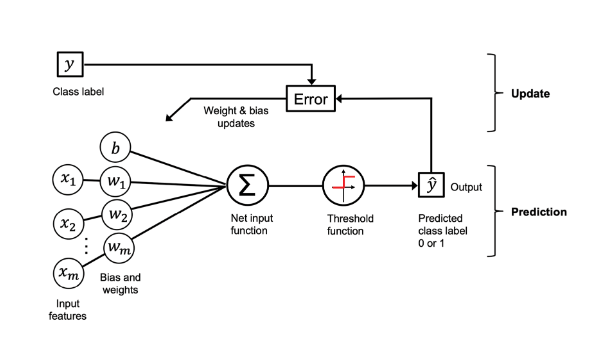

In [3]:
iris = sns.load_dataset('iris')
iris.shape

(150, 5)

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris_df = iris[iris.species != 'virginica']
iris_df.species.value_counts()

species
setosa        50
versicolor    50
Name: count, dtype: int64

In [6]:
X = iris_df.iloc[:,[0,2]].values
y = iris_df['species'].values

In [7]:
y = np.where(y == 'setosa', 0, 1)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

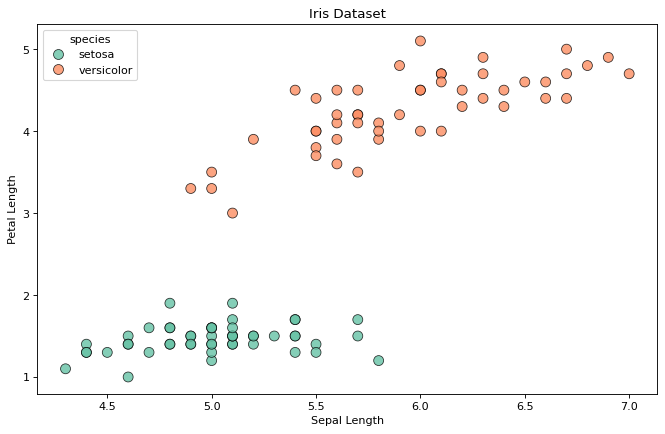

In [15]:
plt.figure(figsize=(10, 6), dpi=80)

sns.scatterplot(
    x='sepal_length', 
    y='petal_length', 
    hue='species', 
    data=iris_df,
    palette='Set2',
    edgecolor='black',
    linewidth=.7,
    alpha=.8,
    s=80
)

plt.title('Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.show()

In [9]:
p = Perceptron(learning_rate=0.1, n_iter=10)
p.fit(X, y)

C:\Users\erik1\AppData\Local\Temp\ipykernel_9684\144377314.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  error += int(update != 0.0)


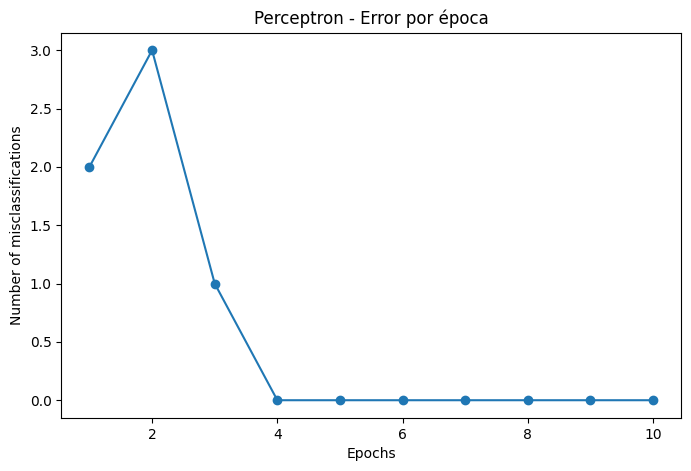

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(p.errors_) + 1), p.errors_, marker='o')
plt.title('Perceptron - Error por época')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [11]:
decision_line_slope = -p.w_[0] / p.w_[1]
decision_line_intercept = -p.b_ / p.w_[1]

# Crear puntos para trazar la línea de decisión
x_values = np.linspace(4, 7, 100)
y_values = decision_line_slope * x_values + decision_line_intercept

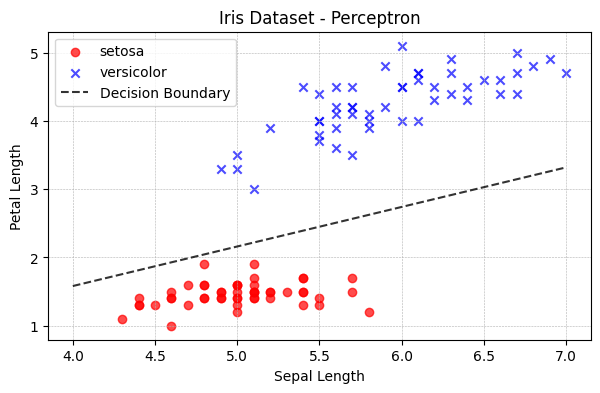

In [12]:
plt.figure(figsize=(7,  4))

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa', alpha=0.7)
plt.scatter(X[50:, 0], X[50:, 1], color='blue', marker='x', label='versicolor', alpha=0.7)
plt.plot(x_values, y_values, color='black', linewidth=1.5, label='Decision Boundary', alpha=0.8, linestyle='--')

plt.title('Iris Dataset - Perceptron')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.grid(True, linestyle='--', linewidth=0.4)
plt.legend(loc='upper left')
plt.show()